In [1]:
# necessary libraries
# numpy for handling numeric data
# pandas for EDA
# missingno for checking missing values in dataframe
# matplotlib for plotting
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# loading the data
df=pd.read_csv('Airbnb.csv')

In [3]:
# first 20 entries
df.head(20)

,id,name,host_id,host_name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number_of_reviews,last review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,6/9/2019,1.33,4,188


In [4]:
# 48900 rows and 16 columns
df.shape

(48900, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood group',
       'neighbourhood', 'latitude', 'longitude', 'room type', 'price',
       'minimum nights', 'number_of_reviews', 'last review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# Using str.replace() method with column labels to change " " empty spaces to underscores “ _ “ for consistency
df.columns=df.columns.str.replace(" ","_")
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [7]:
# there are 5 columns that contain integer, 5 contains floats and 6 are of object dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48900 entries, 0 to 48899
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48900 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48900 non-null  int64  
 3   host_name                       48879 non-null  object 
 4   neighbourhood_group             48900 non-null  object 
 5   neighbourhood                   48900 non-null  object 
 6   latitude                        48900 non-null  float64
 7   longitude                       48900 non-null  float64
 8   room_type                       48900 non-null  object 
 9   price                           48900 non-null  float64
 10  minimum_nights                  48900 non-null  float64
 11  number_of_reviews               48900 non-null  int64  
 12  last_review                     

In [8]:
# We have converted float columns into integer datatype and just 
# because there is no object dtype which means price don't contain "$" or other special characters.
df['minimum_nights']=df['minimum_nights'].astype(int)
df['price']=df['price'].astype(int)

In [9]:
df['last_review'].value_counts()[:10].sort_values(ascending=False)

last_review
6/23/2019    1413
7/1/2019     1359
6/30/2019    1341
6/24/2019     875
7/7/2019      718
7/2/2019      658
6/22/2019     656
6/16/2019     601
7/5/2019      580
7/6/2019      565
Name: count, dtype: int64

In [10]:
# Handled the missing values in 'last_review' column and converted the 'last_review' column to a datetime column
df['last_review'].fillna(method='ffill',inplace=True)
pd.to_datetime(df['last_review'])

/tmp/ipykernel_112969/4135276770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(method='ffill',inplace=True)
/tmp/ipykernel_112969/4135276770.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['last_review'].fillna(method='ffill',inplace=True)


0       2018-10-19
1       2019-05-21
2       2019-05-21
3       2019-07-05
4       2018-11-19
           ...    
48895   2019-07-08
48896   2019-07-08
48897   2019-07-08
48898   2019-07-08
48899   2019-07-08
Name: last_review, Length: 48900, dtype: datetime64[ns]

In [11]:
# .describe() methods tells us about the distribution of the data. As the data that is in Normalized form
# can be a good fit for machine learning models. The Normal distribution of the data depends upon the standard
# deviations. Also, this gives us necessary information about the data i.e InterQuartile ranges (25 % , 50 % , 75 %)
# If we look upto 'minimum_nights' , we can clearly see over here that 75 % of the data falls between 1-5 values while other 25%
# contains rest of the values. So, the data is very skewed.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.890000e+04,4.890000e+04,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,38848.000000,48900.000000,48900.000000
mean,1.901520e+07,6.761310e+07,40.728949,-73.952172,152.720511,7.032168,23.279693,1.373126,7.143374,112.783742
std,1.098423e+07,7.860992e+07,0.054529,0.046155,240.142704,20.513684,44.555777,1.680367,32.950889,131.626347
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470353e+06,7.812758e+06,40.690100,-73.983072,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967620e+07,3.079058e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915173e+07,1.074344e+08,40.763112,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
#* .describe() by putting arg = 'object' gives us the information about categorical data as well while .describe() without 
# passing argument only gives us information about numeric data
# Also,there is a high repitition among columns like neighbourhood_group & room_type
df.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48884,48879,48900,48900,48900,48900
unique,47896,11452,6,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,7/1/2019
freq,18,417,21664,3920,25413,1838


In [13]:
# identified total number of duplicates in dataframe
df.duplicated().sum()

5

In [14]:
# dropped those duplicates
df.drop_duplicates(inplace=True)

In [15]:
# now we can see over here that 5 rows has been removed
df.shape

(48895, 16)

In [16]:
# Here we have computed the number of missing values percentage for each column. When we call .mean(), it computes
# the average along axis=0 (which is column wise)
# Since the values are True and False (boolean), they are treated as 1 and 0, respectively.
# So, the mean gives the proportion of True values (i.e., the proportion of null values in each column).
for col in df.columns:
    missing_value_percent=df[col].isnull().mean()*100
    print(df[col].name ,":-",missing_value_percent,"%")

id :- 0.0 %
name :- 0.03272318232948154 %
host_id :- 0.0 %
host_name :- 0.04294917680744453 %
neighbourhood_group :- 0.0 %
neighbourhood :- 0.0 %
latitude :- 0.0 %
longitude :- 0.0 %
room_type :- 0.0 %
price :- 0.0 %
minimum_nights :- 0.0 %
number_of_reviews :- 0.0 %
last_review :- 0.0 %
reviews_per_month :- 20.55833929849678 %
calculated_host_listings_count :- 0.0 %
availability_365 :- 0.0 %


In [ ]:
bar=msno.bar(df)
bar # Column by Column it will tell how many percentage values are present. So for example DTS column has only 10% values present.
msno.matrix(df)

In [17]:
# Dropped the NAN rows entirely of those attributes which were in very low number
df.dropna(subset=['name'], inplace=True)


In [18]:
df.dropna(subset=['host_name'], inplace=True)

Because we've assumed that Nan means there would be no reveiws. That's why we are going to replace it with the mode.

In [19]:
df['reviews_per_month'].describe()

count    38821.000000
mean         1.373229
std          1.680328
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [20]:
df['reviews_per_month'].isnull().sum()

10037

In [21]:
df['reviews_per_month'].nunique()

937

<Axes: >

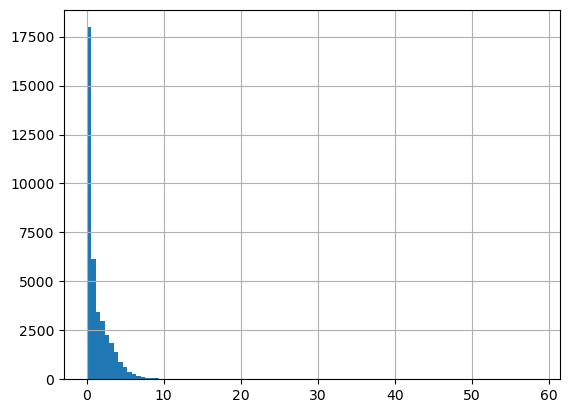

In [22]:
df['reviews_per_month'].hist(bins=100)

In [23]:
df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0])

In [24]:
df['reviews_per_month'].isnull().sum()

0

In [25]:
# Dropped columns 'last_review','name','id'
df.drop(['last_review','name','id'],axis=1)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.02,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48895,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.02,2,9
48896,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.02,2,36
48897,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.02,1,27
48898,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.02,6,2


In [26]:
# Neighbourhood column contains data that a significant number of unique values though it is a categorical column
print(df['room_type'].nunique())
print(df['neighbourhood_group'].nunique())
print(df['neighbourhood'].nunique())

3
6
221


In [29]:
# Top 10 host IDs using host_id based on number of reviews
topHostIDs = df.groupby('host_id')['id'].sum().sort_values(ascending=False).head(10)
topHostIDs

host_id
219517861    10885561678
107434423     7210036953
137358866     3121544245
12243051      2517132868
200380610     1821814003
61391963      1621038073
30283594      1611854192
16098958      1581720858
205031545     1415225676
22541573      1380302583
Name: id, dtype: int64

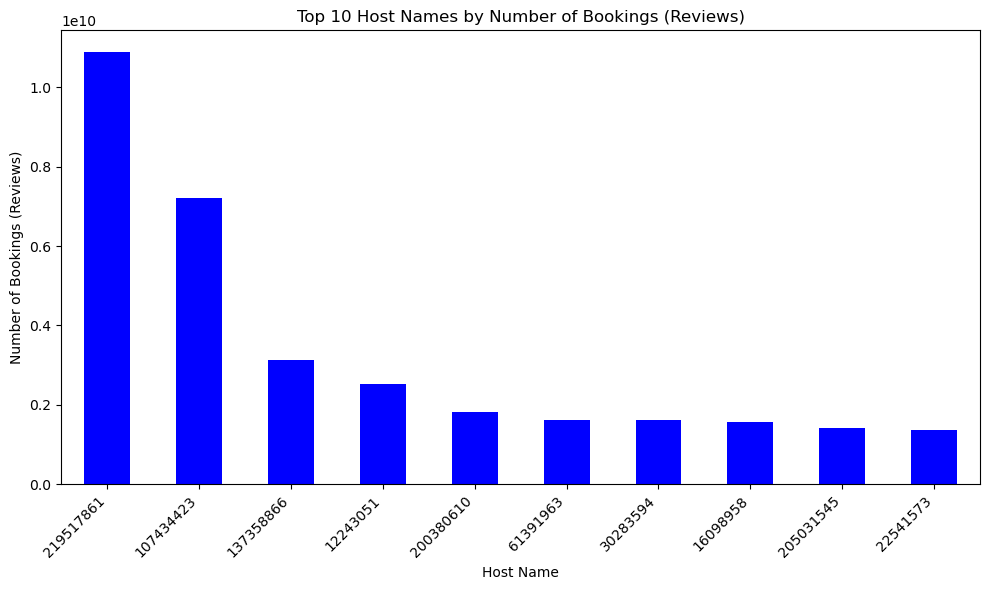

In [30]:

plt.figure(figsize=(10, 6))
topHostIDs.plot(kind='bar', color='blue')
plt.title('Top 10 Host Names by Number of Bookings (Reviews)')
plt.xlabel('Host Name')
plt.ylabel('Number of Bookings (Reviews)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [38]:
top_hosts=df[df['host_id'].isin(topHostIDs.index)]

In [60]:
#types of rooms the host with the highest number of bookings offer, and the price range for these rooms
top_hosts.groupby('room_type')['price'].agg(['min', 'max'])

,min,max
room_type,,
Entire home/apt,70,1170
Private room,24,616


In [61]:
#Identification of the neighbourhood group with the highest number of bookings
neighbourhood_group_bookings = df.groupby('neighbourhood_group')['id'].sum().sort_values(ascending=False)

In [62]:
neighbourhood_group_bookings

neighbourhood_group
Manhattan        406464715814
Brooklyn         366894903212
Queens           123252160532
Bronx             24775159194
Staten Island      8055857451
Broklyn                 34900
Name: id, dtype: int64

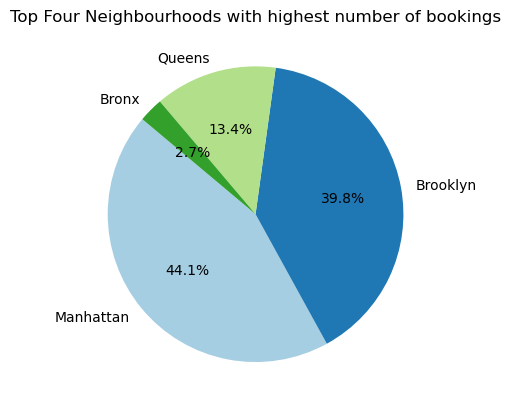

In [63]:
#Visualization of the neighbourhood group with the highest number of bookings
plt.pie(neighbourhood_group_bookings[:4], labels=neighbourhood_group_bookings.index[:4], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top Four Neighbourhoods with highest number of bookings")
plt.show()

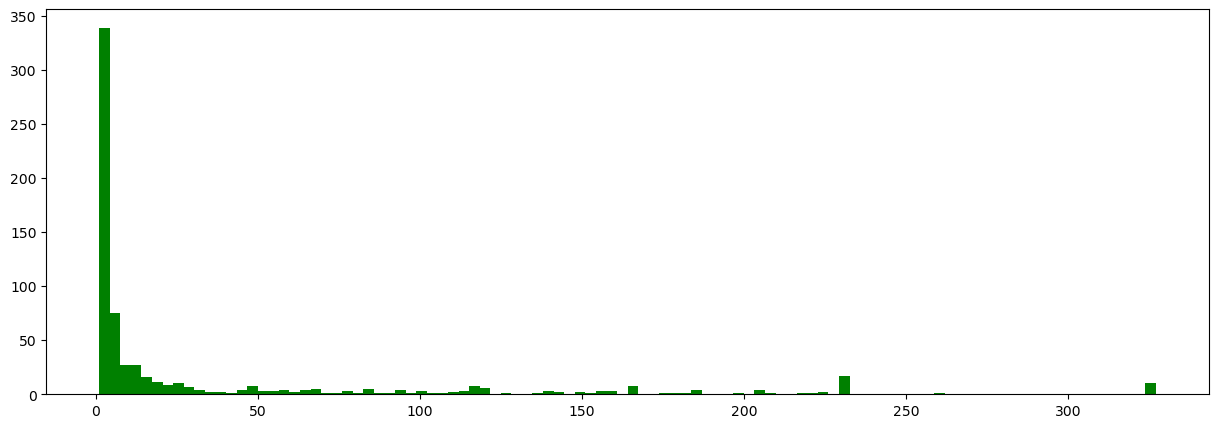

In [88]:
# averge price of listings
mean_listings=df.groupby('price')['calculated_host_listings_count'].mean()
plt.figure(figsize=(15,5))
plt.hist(mean_listings.values, color='green', bins=100)
plt.show()

In [94]:
#minimum and maximum prices of the listings
min_listing=df.groupby('price')['calculated_host_listings_count'].min()
max_listing=df.groupby('price')['calculated_host_listings_count'].max()
print(min_listing)
print(max_listing)

price
0         1
10        1
11        1
12        1
13        3
         ..
7703     12
8000     11
8500      1
9999      1
10000     1
Name: calculated_host_listings_count, Length: 674, dtype: int64
price
0         6
10        4
11        1
12        1
13        3
         ..
7703     12
8000     11
8500      1
9999      1
10000     1
Name: calculated_host_listings_count, Length: 674, dtype: int64


In [99]:
# average prices of different room types
average_prices_by_room_type = df.groupby('room_type')['price'].mean()
print(average_prices_by_room_type)

room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
Name: price, dtype: float64


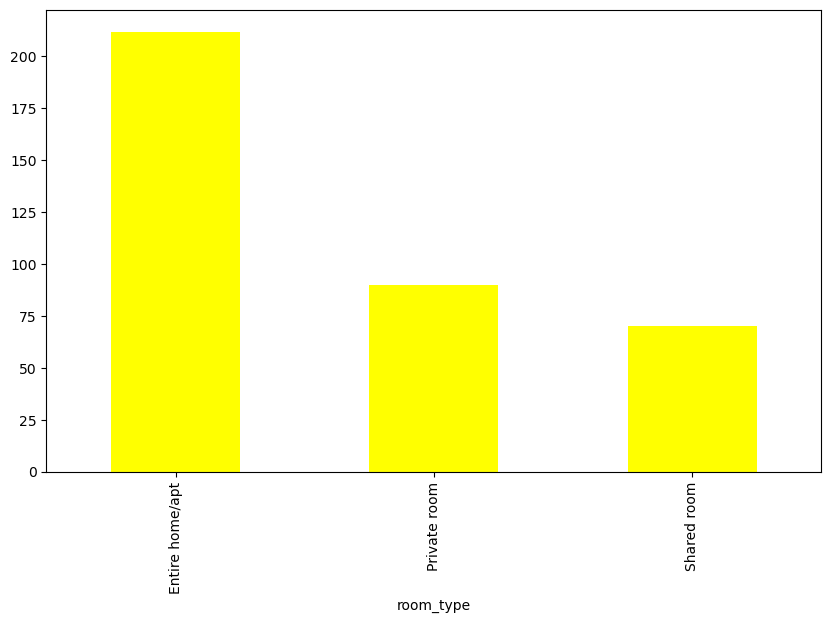

In [103]:
# visualization of average prices of different room types
plt.figure(figsize=(10, 6))
average_prices_by_room_type.plot(kind='bar', color='yellow')
plt.show()

In [105]:
neighbourhood_group_reviews = df.groupby('neighbourhood_group')['number_of_reviews'].sum()

In [106]:
neighbourhood_group_reviews.max()

486002

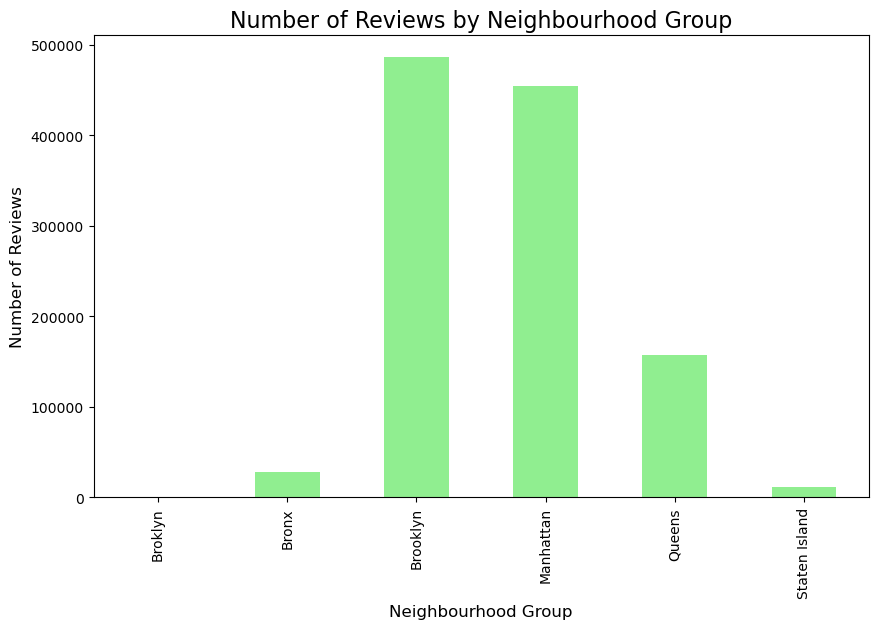

In [117]:
plt.figure(figsize=(10, 6))
neighbourhood_group_reviews.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.title('Number of Reviews by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

Brooklyn has the highest number of reviews at 486,002, followed closely by Manhattan with 454,126 reviews. These two neighborhoods has majority of the reviews, which indicates that they are the most popular areas for listings and attracts a big chunk of guests